# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

    # Get the temperature from the response
    print(f"The weather API responded for city {city} with: {weather_json}.")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
The weather API responded for city port-aux-francais with: {'coord': {'lon': 70.2167, 'lat': -49.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.58, 'feels_like': -6.42, 'temp_min': 0.58, 'temp_max': 0.58, 'pressure': 999, 'humidity': 63, 'sea_level': 999, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 15.71, 'deg': 245, 'gust': 17.5}, 'clouds': {'all': 96}, 'dt': 1723866860, 'sys': {'country': 'TF', 'sunrise': 1723861322, 'sunset': 1723897477}, 'timezone': 18000, 'id': 1546102, 'name': 'Port-aux-Français', 'cod': 200}.
Processing Record 1 of Set 1 | port-aux-francais
The weather API responded for city bredasdorp with: {'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.35, 'feels_like': 5.57, 'temp_min': 7.35, 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,0.58,63,96,15.71,TF,1723866860
1,bredasdorp,-34.5322,20.0403,7.35,90,0,2.65,ZA,1723866862
2,tiksi,71.6872,128.8694,12.97,54,11,2.72,RU,1723866863
3,jinchang,38.4953,102.1739,28.06,20,0,4.18,CN,1723866864
4,lagunillas,10.1301,-71.2595,26.47,82,42,2.99,VE,1723866866


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,0.58,63,96,15.71,TF,1723866860
1,bredasdorp,-34.5322,20.0403,7.35,90,0,2.65,ZA,1723866862
2,tiksi,71.6872,128.8694,12.97,54,11,2.72,RU,1723866863
3,jinchang,38.4953,102.1739,28.06,20,0,4.18,CN,1723866864
4,lagunillas,10.1301,-71.2595,26.47,82,42,2.99,VE,1723866866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

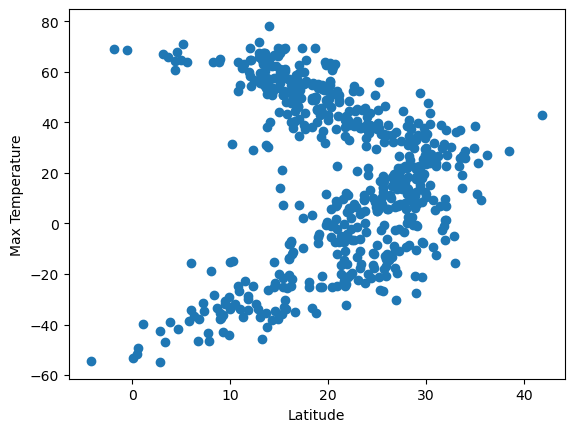

In [10]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.show()

#### Latitude Vs. Humidity

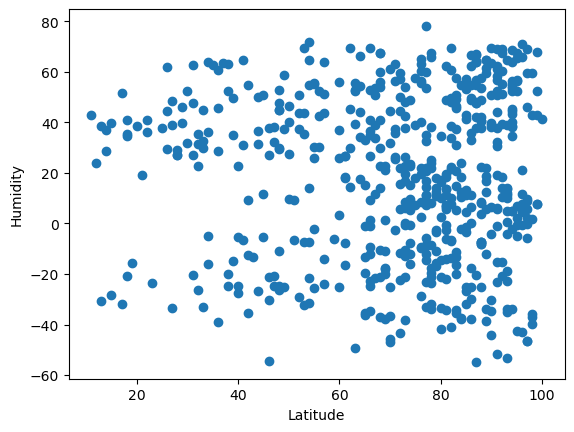

In [11]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

#### Latitude Vs. Cloudiness

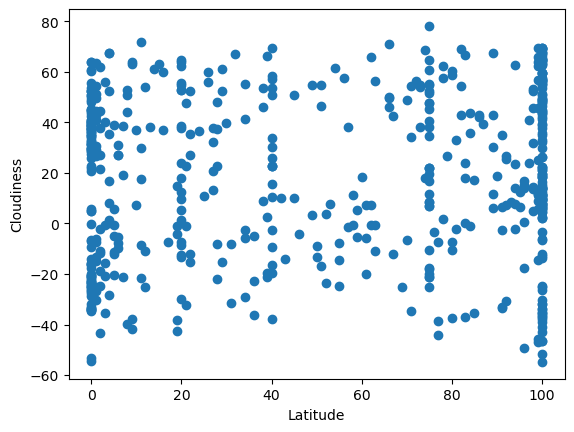

In [12]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

#### Latitude vs. Wind Speed Plot

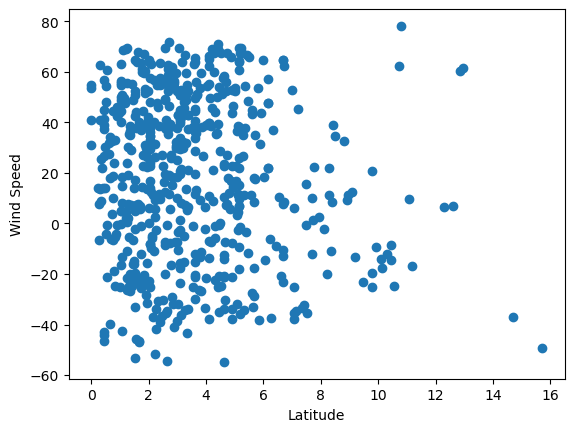

In [13]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_vals,y_vals,title,text_coordinates):

    (m, b, r, p, stderr) = linregress (x_vals,y_vals)
    regress_values = x_vals * m + b
    line_eq = "y = " + str(round(m,2)) + " x + " + str(round(b,2))

    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("")
    print(f"The r-squared is: {r}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tiksi,71.6872,128.8694,12.97,54,11,2.72,RU,1723866863
3,jinchang,38.4953,102.1739,28.06,20,0,4.18,CN,1723866864
4,lagunillas,10.1301,-71.2595,26.47,82,42,2.99,VE,1723866866
5,yellowknife,62.4560,-114.3525,14.67,91,20,4.12,CA,1723866867
7,ribeira grande,38.5167,-28.7000,22.65,82,0,1.34,PT,1723866870


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,0.58,63,96,15.71,TF,1723866860
1,bredasdorp,-34.5322,20.0403,7.35,90,0,2.65,ZA,1723866862
6,ushuaia,-54.8000,-68.3000,2.81,87,100,4.63,AR,1723866776
8,lebu,-37.6167,-73.6500,6.78,84,100,7.06,CL,1723866872
10,adamstown,-25.0660,-130.1015,19.33,70,100,9.79,PN,1723866875


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6740469348872691


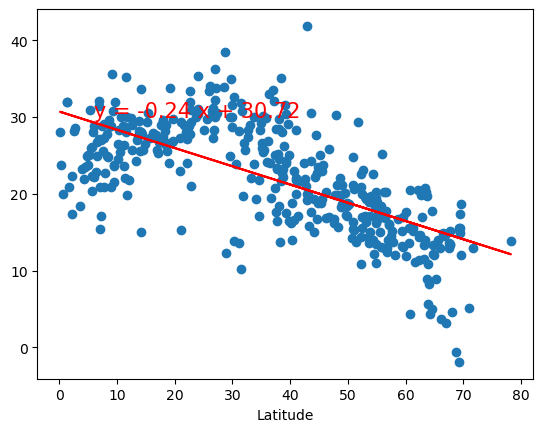

In [19]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.7515413519775244


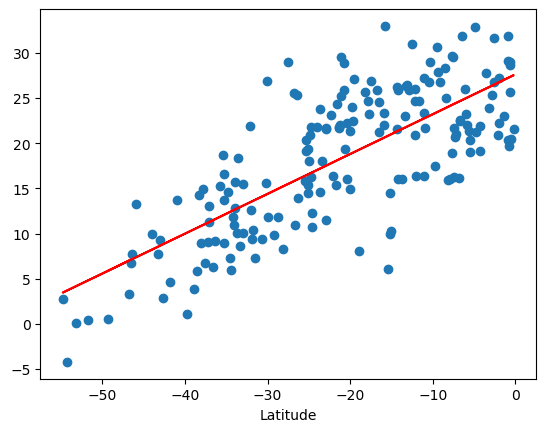

In [20]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** Northern hemisphere: Medium strength negative correlation. -- Southern hemisphere: medium strength positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.07417653646508617


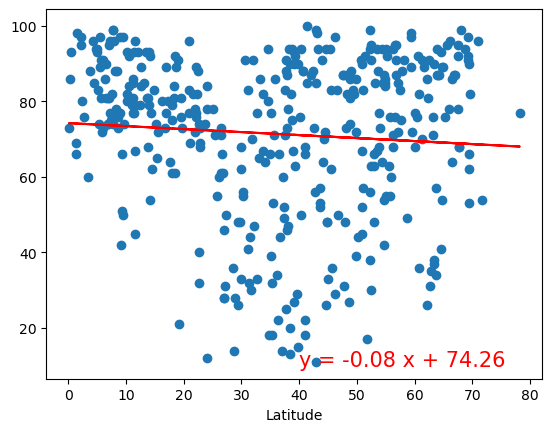

In [21]:
# Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.006019756115936592


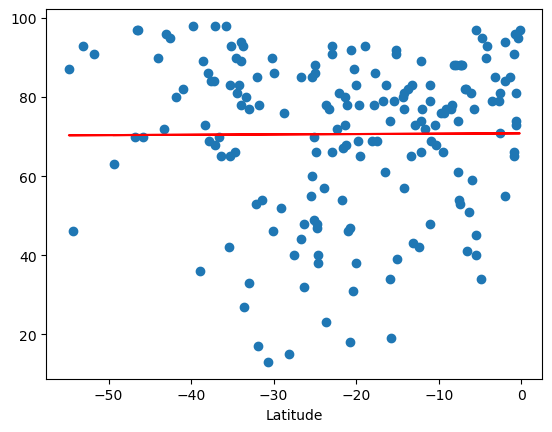

In [22]:
# Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** Neither the northern or the southern hemispheres have any discernable correlation when it comes to latitude vs humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.1035098199818239


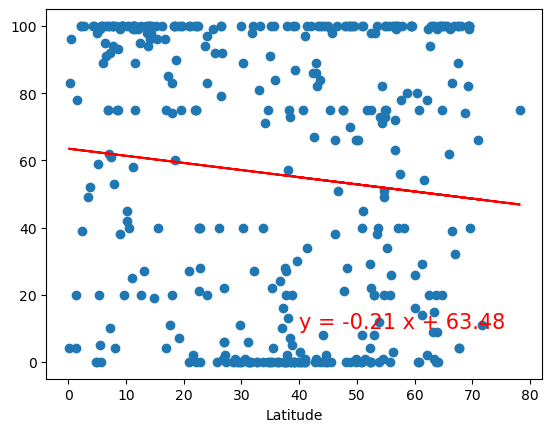

In [23]:
# Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.16844032435990505


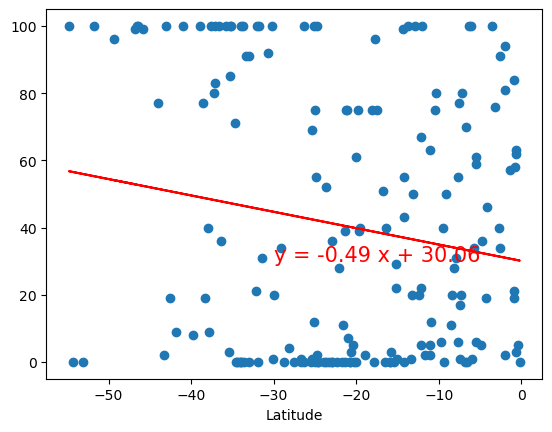

In [24]:
# Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** Very weak negative correlations in both hemispheres between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.02765220957225164


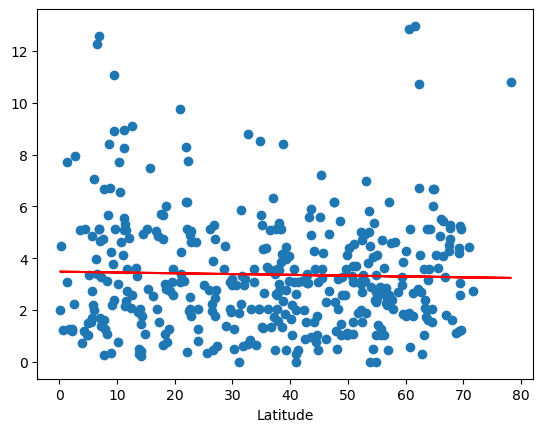

In [25]:
# Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.01971749320632319


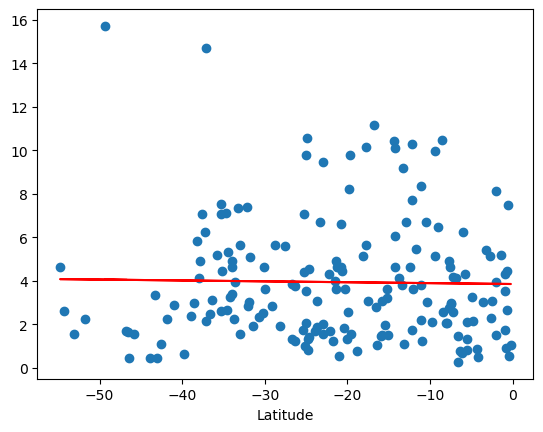

In [26]:
# Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** Again, no correlation between latitude and wind speed in either hemisphere.